In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
df_clean = pd.read_csv("df_clean.csv")

In [5]:
df_clean.head(3)

,count_point_id,direction_of_travel,year,count_date,hour,region_id_raw,region_name_raw,local_authority_id_raw,local_authority_name_raw,road_name_raw,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,6000,S,2000,2000-03-27,7,6,London,57,Barnet,M1,...,5,421,30,5,4,6,11,11.0,67.0,2311.0
1,6000,N,2000,2000-03-27,14,6,London,57,Barnet,M1,...,20,330,66,1,14,14,26,17.0,138.0,1559.0
2,6000,S,2000,2000-03-27,17,6,London,57,Barnet,M1,...,6,64,9,0,1,7,12,2.0,31.0,710.0


In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414252 entries, 0 to 414251
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   count_point_id                414252 non-null  int64  
 1   direction_of_travel           414252 non-null  object 
 2   year                          414252 non-null  int64  
 3   count_date                    414252 non-null  object 
 4   hour                          414252 non-null  int64  
 5   region_id_raw                 414252 non-null  int64  
 6   region_name_raw               414252 non-null  object 
 7   local_authority_id_raw        414252 non-null  int64  
 8   local_authority_name_raw      414252 non-null  object 
 9   road_name_raw                 414252 non-null  object 
 10  road_type_raw                 414252 non-null  object 
 11  easting_raw                   414252 non-null  int64  
 12  northing_raw                  414252 non-nul

In [7]:
df_plot = df_clean.copy()

# Convert count_date to datetime
df_plot['count_date'] = pd.to_datetime(df_plot['count_date'])

# Extract day_of_week and date
df_plot['day_of_week'] = df_plot['count_date'].dt.day_name()
df_plot['date'] = df_plot['count_date'].dt.date

# Use all_motor_vehicles as "volume"
df_plot['volume'] = df_plot['all_motor_vehicles']

In [8]:
print(df_plot.direction_of_travel.unique())
print(df_plot.region_name_raw.unique())
print(df_plot.local_authority_name_raw.unique())
print(df_plot.road_type_raw.unique())

['S' 'N' 'E' 'W' 's' 'e']
['London']
['Barnet' 'Hillingdon' 'Tower Hamlets' 'Islington' 'Southwark' 'Lewisham'
 'Greenwich' 'Bexley' 'Lambeth' 'Wandsworth' 'Westminster'
 'Kensington and Chelsea' 'Hounslow' 'Brent' 'Enfield' 'Hackney'
 'Redbridge' 'Waltham Forest' 'Croydon' 'Camden' 'Hammersmith and Fulham'
 'Ealing' 'Haringey' 'Newham' 'Barking and Dagenham' 'City of London'
 'Richmond upon Thames' 'Bromley' 'Sutton' 'Kingston upon Thames' 'Harrow'
 'Havering' 'Merton']
['Major' 'Minor']


In [9]:
df_plot['direction_of_travel'] = df_plot['direction_of_travel'].str.upper()
print(df_plot.direction_of_travel.unique())

['S' 'N' 'E' 'W']


In [10]:
df_plot.iloc[0]

count_point_id                                 6000
direction_of_travel                               S
year                                           2000
count_date                      2000-03-27 00:00:00
hour                                              7
region_id_raw                                     6
region_name_raw                              London
local_authority_id_raw                           57
local_authority_name_raw                     Barnet
road_name_raw                                    M1
road_type_raw                                 Major
easting_raw                                  522170
northing_raw                                 189100
latitude_raw                              51.587522
longitude_raw                             -0.237927
link_length_km_raw                              4.1
link_length_miles_raw                          2.55
pedal_cycles                                      0
two_wheeled_motor_vehicles                       48
cars_and_tax

# Univariate Analysis

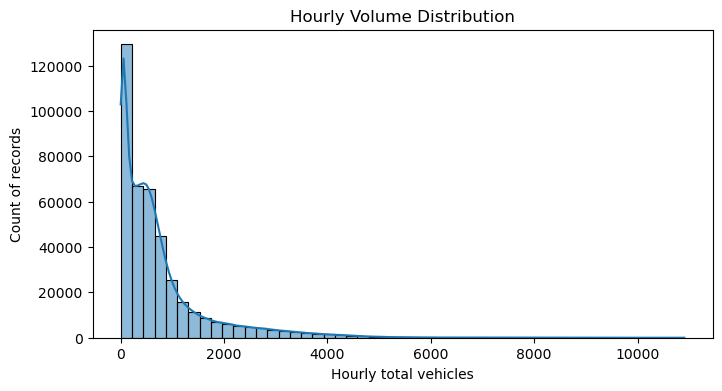

In [12]:
# 1. Hourly Volume Distribution
plt.figure(figsize=(8,4))
sns.histplot(df_plot['volume'], bins=50, kde=True)
plt.title("Hourly Volume Distribution")
plt.xlabel("Hourly total vehicles")
plt.ylabel("Count of records")
plt.show()

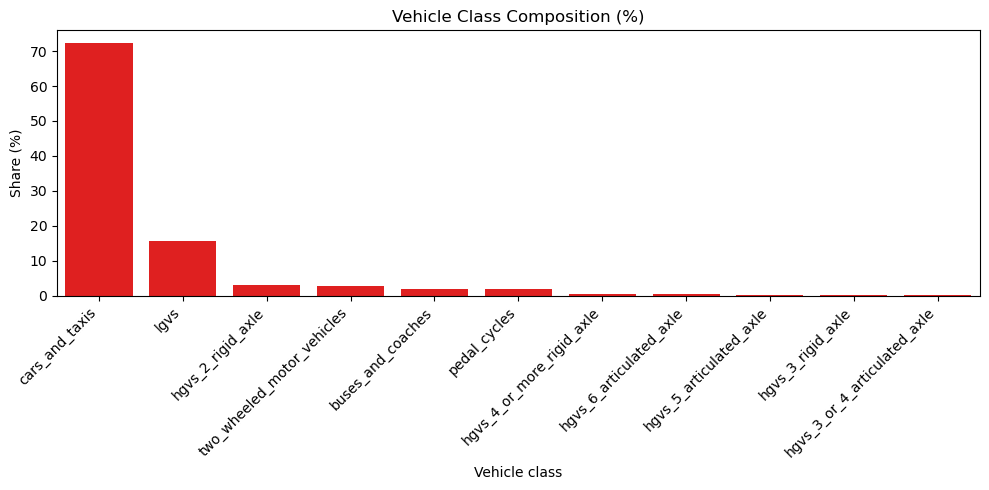

In [13]:
vehicle_cols = [
    'cars_and_taxis', 'lgvs', 'hgvs_2_rigid_axle', 'two_wheeled_motor_vehicles',
    'buses_and_coaches', 'pedal_cycles', 'hgvs_4_or_more_rigid_axle',
    'hgvs_6_articulated_axle', 'hgvs_5_articulated_axle',
    'hgvs_3_rigid_axle', 'hgvs_3_or_4_articulated_axle'
]

# Calculate total count of each vehicle type across dataset
vehicle_totals = df_plot[vehicle_cols].sum()

# Convert to percentages
vehicle_percent = (vehicle_totals / vehicle_totals.sum()) * 100

plt.figure(figsize=(10,5))
sns.barplot(x=vehicle_percent.index, y=vehicle_percent.values, color='red')
plt.title("Vehicle Class Composition (%)")
plt.xlabel("Vehicle class")
plt.ylabel("Share (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

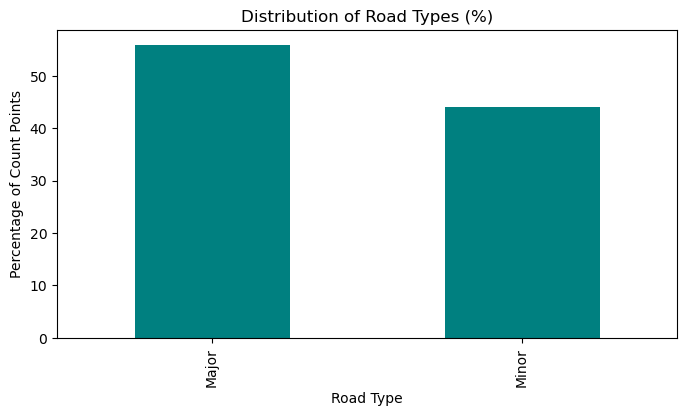

In [14]:
plt.figure(figsize=(8,4))
df_plot['road_type_raw'].value_counts(normalize=True).mul(100).plot(kind='bar', color='teal')
plt.title("Distribution of Road Types (%)")
plt.xlabel("Road Type")
plt.ylabel("Percentage of Count Points")
plt.show()

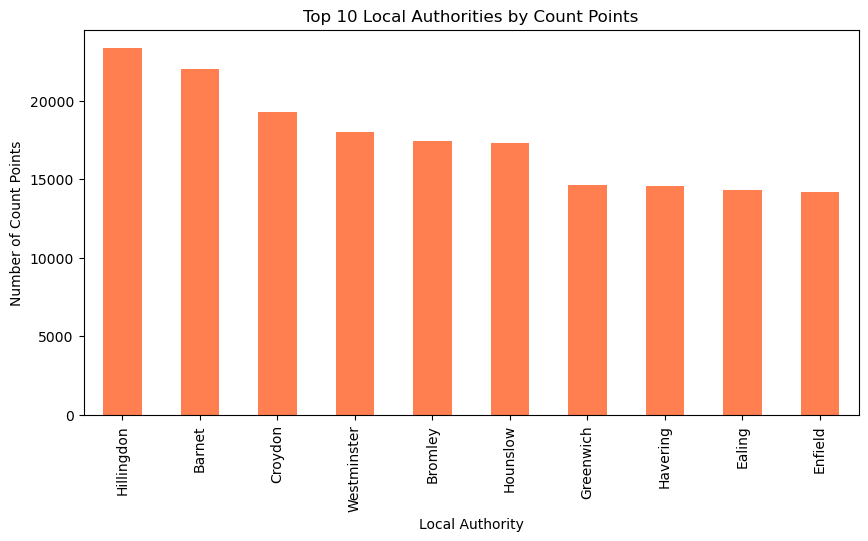

In [15]:
plt.figure(figsize=(10,5))
df_plot['local_authority_name_raw'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title("Top 10 Local Authorities by Count Points")
plt.xlabel("Local Authority")
plt.ylabel("Number of Count Points")
plt.show()

# Bivariate Analysis

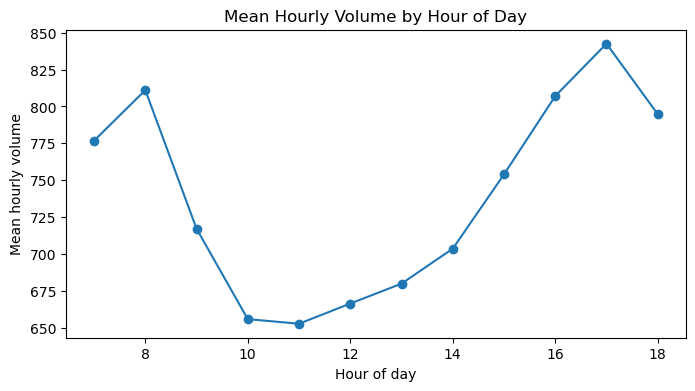

In [17]:
# 1. Mean Hourly Volume by Hour of Day
plt.figure(figsize=(8,4))
df_plot.groupby('hour')['volume'].mean().plot(marker='o')
plt.title("Mean Hourly Volume by Hour of Day")
plt.xlabel("Hour of day")
plt.ylabel("Mean hourly volume")
plt.show()

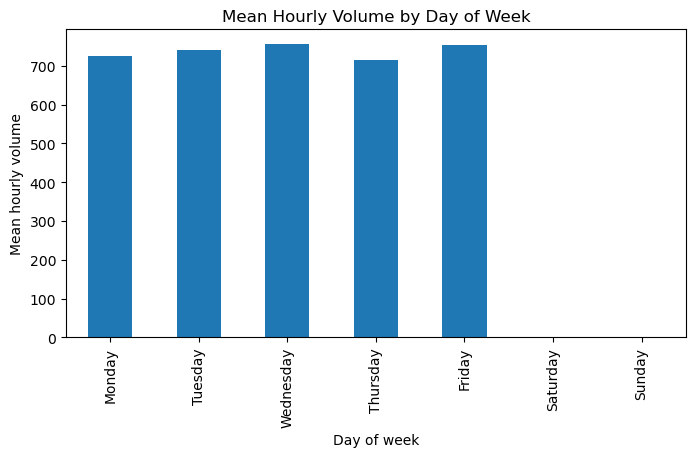

In [18]:
# 2. Mean Hourly Volume by Day of Week
plt.figure(figsize=(8,4))
df_plot.groupby('day_of_week')['volume'].mean().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
).plot(kind='bar')
plt.title("Mean Hourly Volume by Day of Week")
plt.xlabel("Day of week")
plt.ylabel("Mean hourly volume")
plt.show()

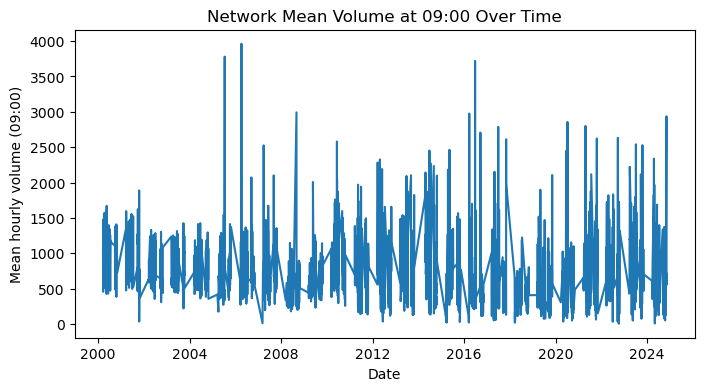

In [19]:
# 3. Network Mean Volume at 09:00 Over Time
plt.figure(figsize=(8,4))
df_plot[df_plot['hour']==9].groupby('date')['volume'].mean().plot()
plt.title("Network Mean Volume at 09:00 Over Time")
plt.xlabel("Date")
plt.ylabel("Mean hourly volume (09:00)")
plt.show()

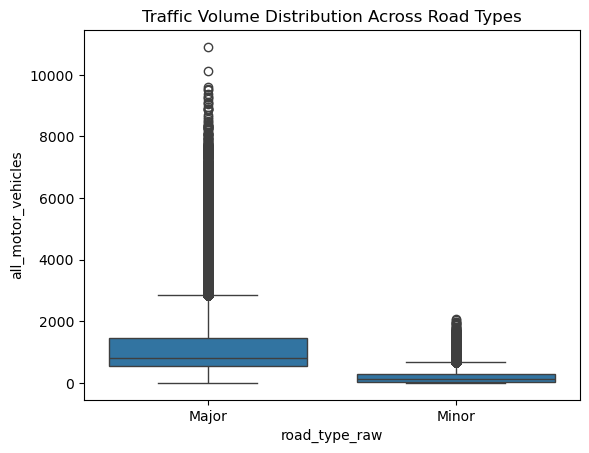

In [20]:
sns.boxplot(data=df_clean, x='road_type_raw', y='all_motor_vehicles')
plt.title("Traffic Volume Distribution Across Road Types")
plt.show()

### Multivariate Analysis

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_clean['count_date'] = pd.to_datetime(df_clean['count_date'])
df_clean['day_of_week'] = df_clean['count_date'].dt.day_name()

# Create derived features
df_clean['truck_pct'] = (df_clean['lgvs'] + df_clean['all_hgvs']) / df_clean['all_motor_vehicles']
df_clean['cars_share'] = df_clean['cars_and_taxis'] / df_clean['all_motor_vehicles']
df_clean['volume'] = df_clean['all_motor_vehicles']

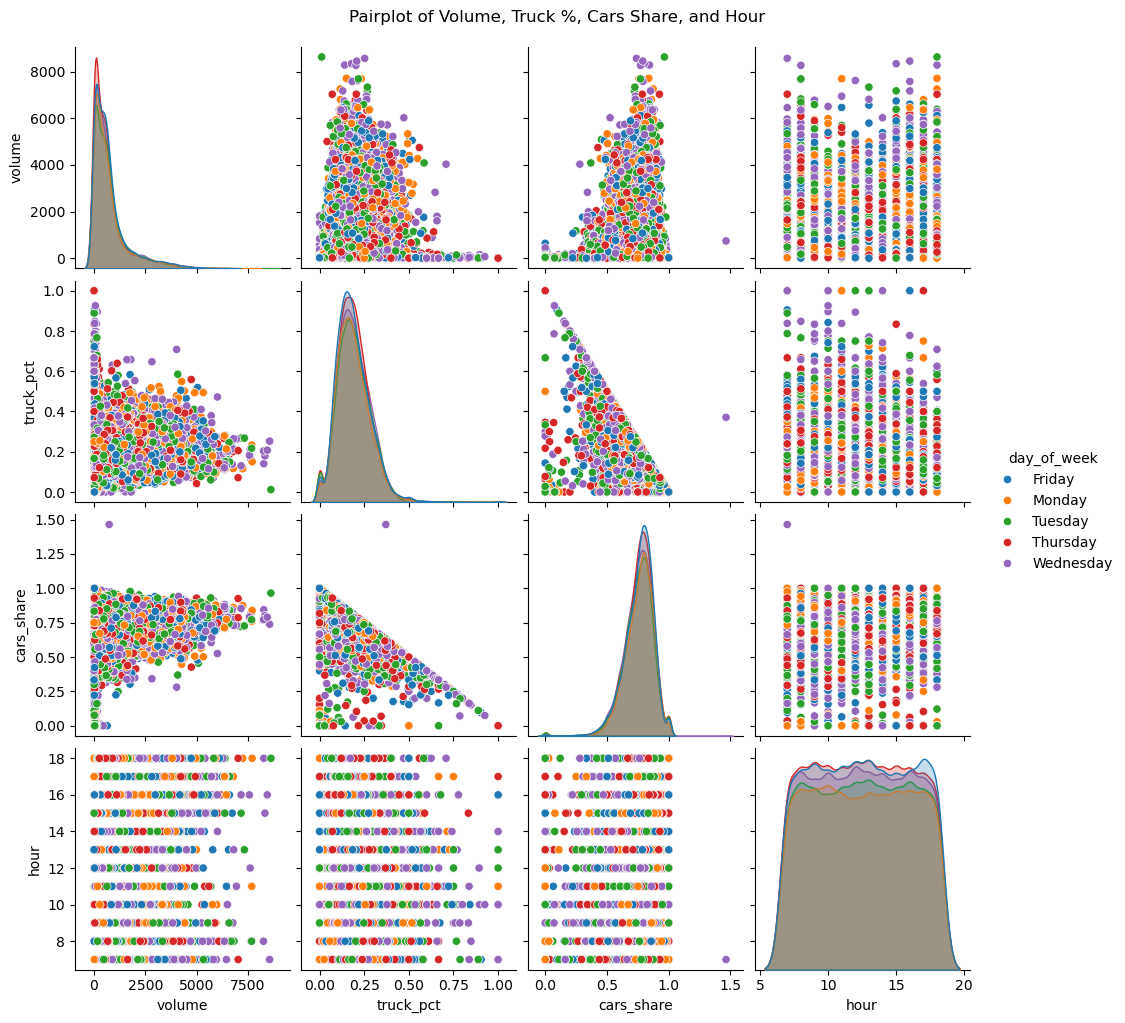

In [23]:
# 1. Pairplot
df_sample = df_clean.sample(50000, random_state=42)

sns.pairplot(df_sample[['volume', 'truck_pct', 'cars_share', 'hour', 'day_of_week']],
             diag_kind="kde", hue="day_of_week")
plt.suptitle("Pairplot of Volume, Truck %, Cars Share, and Hour", y=1.02)
plt.show()

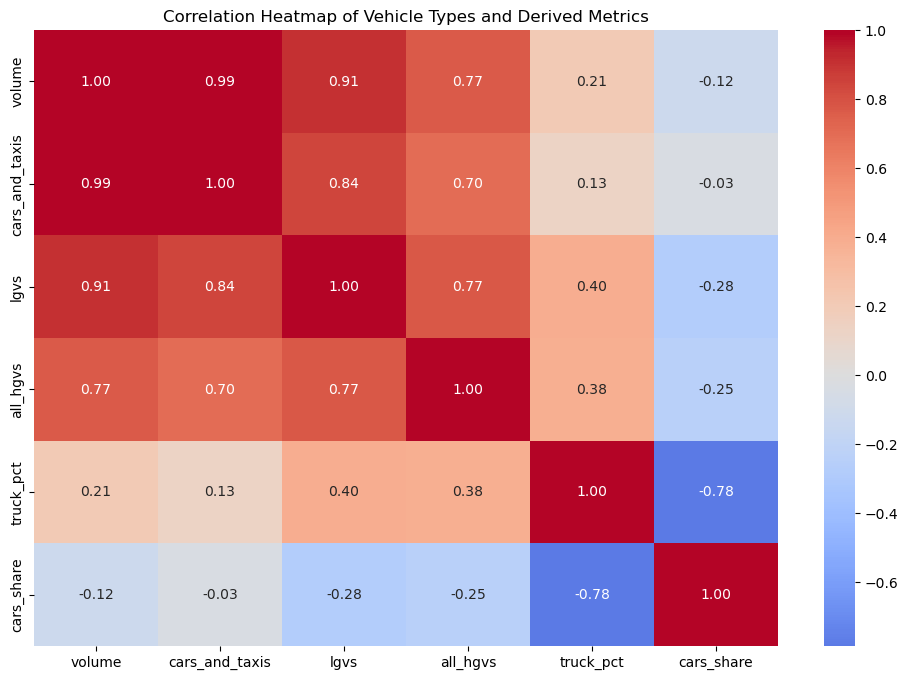

In [24]:
# 2. Correlation Heatmap

plt.figure(figsize=(12,8))
corr = df_clean[['volume', 'cars_and_taxis', 'lgvs', 'all_hgvs', 'truck_pct', 'cars_share']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Heatmap of Vehicle Types and Derived Metrics")
plt.show()

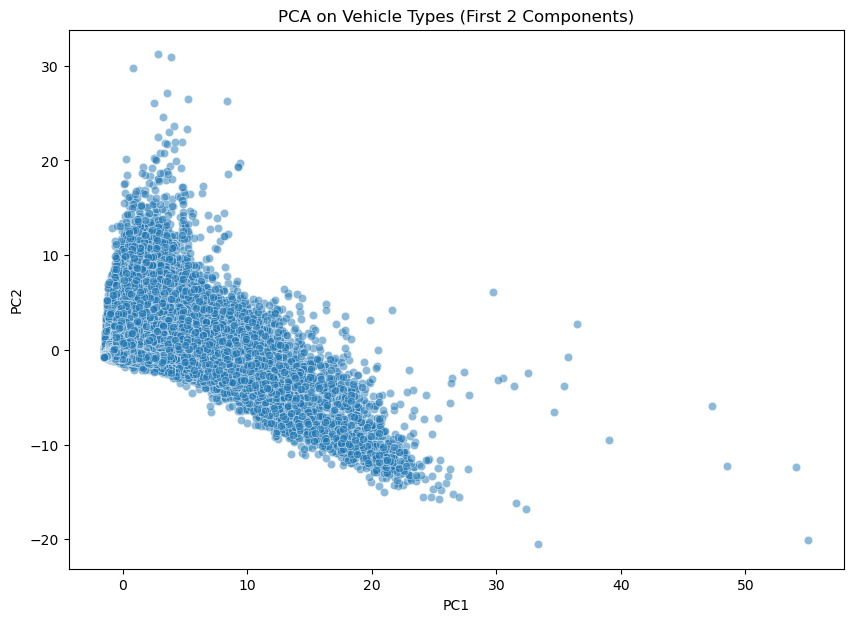

In [25]:
# 3. PCA on Vehicle Types

vehicle_cols = ['pedal_cycles', 'two_wheeled_motor_vehicles', 'cars_and_taxis',
                'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle', 
                'hgvs_3_rigid_axle', 'hgvs_4_or_more_rigid_axle',
                'hgvs_3_or_4_articulated_axle', 'hgvs_5_articulated_axle',
                'hgvs_6_articulated_axle']

X = df_clean[vehicle_cols].fillna(0)
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
plt.figure(figsize=(10,7))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, alpha=0.5)
plt.title("PCA on Vehicle Types (First 2 Components)")
plt.show()

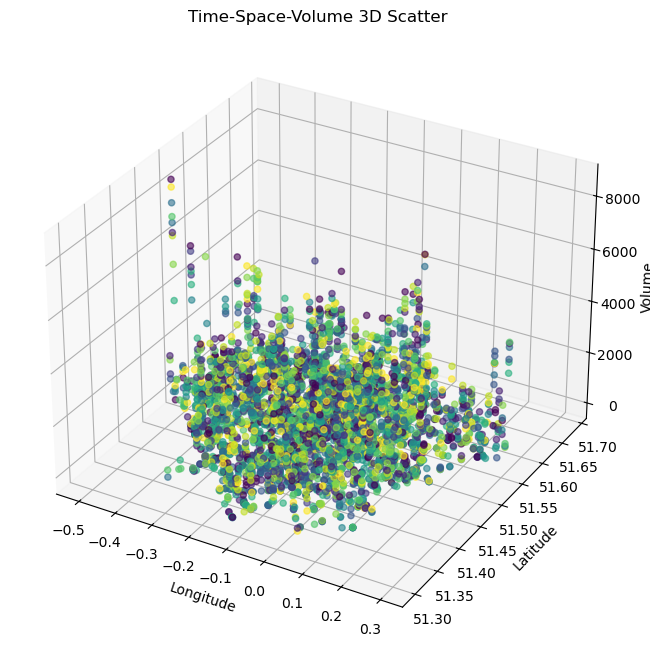

In [26]:
# 4. Time-Space-Volume 3D Analysis

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

sample = df_clean.sample(5000, random_state=42)  # sample for plotting
ax.scatter(sample['longitude_raw'], sample['latitude_raw'], sample['volume'],
           c=sample['hour'], cmap='viridis', alpha=0.6)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_zlabel("Volume")
plt.title("Time-Space-Volume 3D Scatter")
plt.show()